In [47]:
# Import Library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
# Read CSV for all dataset
datacovid = pd.read_csv('datasetcovidsamplejkt.csv')
datacovid.columns

Index(['Tanggal', 'Variant_Suspect', 'Day', 'ID_DAILY_POSITIVE',
       'ID_DAILY_HOSPITALIZED', 'ID_DAILY_CURED', 'ID_DAILY_DEATH',
       'JKT_DAILY_DEATH', 'JKT_DAILY_CURED', 'JKT_DAILY_ISOLATION',
       'JKT_DAILY_HOSPITALIZED', 'JKT_DAILY_POSITIVE',
       'JKT_DAILY_TESTSPECIMENT', 'JKT_DAILY_POSTEST', 'JKT_DAILY_POSTRATE',
       'JKT_CONS_VALUE', 'CoF_HSE', 'PoF_Spec_X_PostRate', 'Risk',
       'Risk_Criteria'],
      dtype='object')

In [49]:
# Select important dataset only for analysis and prediction

covid_JKT = datacovid.loc[:,['Variant_Suspect','Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','Risk']]

covid_Delta = datacovid.loc[datacovid.Variant_Suspect=='Delta',['Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','Risk','Risk_Criteria']]
covid_Omicron = datacovid.loc[datacovid.Variant_Suspect=='Omicron',['Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','Risk','Risk_Criteria']]

In [ ]:
# Review again correlation between each data for variant delta
sns.pairplot(covid_Delta)

In [50]:
# Import Library for Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Declaration test train split for supervise learning
# from pairplot above, we can see that correlation between postivity rate may have linear correlation with positive number.
X_train, X_test, y_train, y_test = train_test_split(covid_Delta.JKT_DAILY_POSTRATE, covid_Delta.JKT_DAILY_POSITIVE)

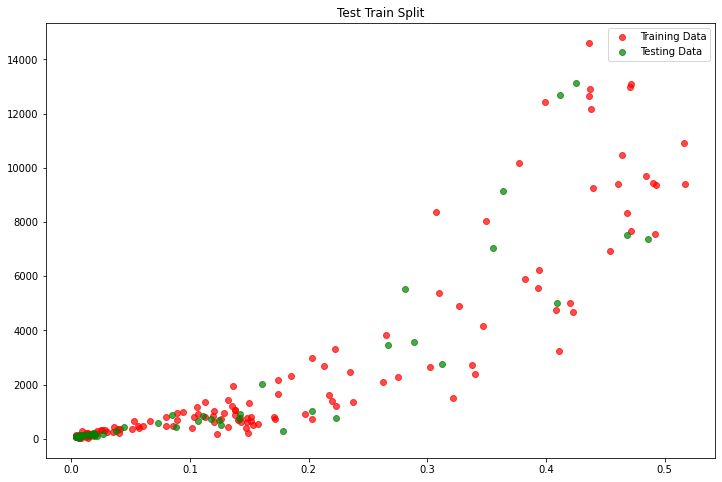

In [51]:
# Test train split visualization
plt.figure(figsize=(12,8))
plt.scatter(X_train, y_train, label='Training Data', color='r',alpha=0.7)
plt.scatter(X_test, y_test, label='Testing Data', color='g',alpha=0.7)
plt.legend()
plt.title("Test Train Split")
plt.show()

In [52]:
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression()

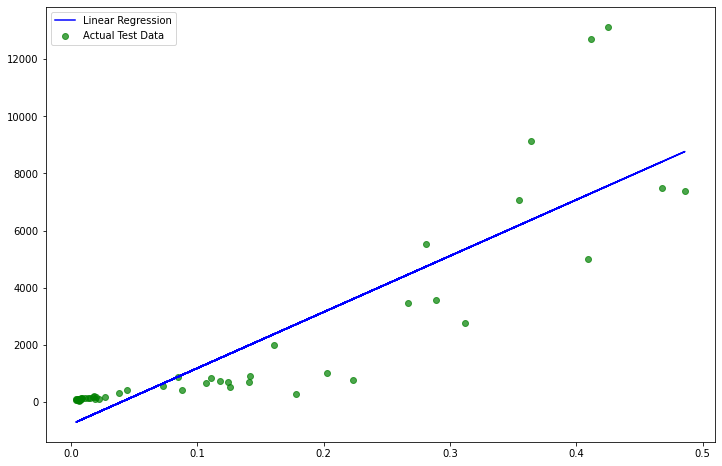

In [54]:
# Use model to predict on test data
prediction = LR.predict(X_test.values.reshape(-1,1))

# Plot prediction line against actual test data
plt.figure(figsize=(12,8))
plt.plot(X_test, prediction, label='Linear Regression', color='b')
plt.scatter(X_test, y_test, label='Actual Test Data', color='g', alpha=0.7)
plt.legend()
plt.show()

In [55]:
#find parameter for Linear Regression

lrcoef = LR.coef_

lrint = LR.intercept_

print("LR Coefficient: ",lrcoef)
print("LR Intercept: ", lrint)

LR Coefficient:  [19633.15912859]
LR Intercept:  -777.7291654668497


In [56]:
#daily_positive_predict = LR.intercept_ + LR.coef_*(daily_postrate)

daily_postrate = 0.4

daily_positive_predict = lrint + lrcoef*daily_postrate

daily_positive_predict

array([7075.53448597])

In [57]:
# direct predict estimated daily_positive_predict using predict

LR.predict(np.array([[0.4]]))[0]

7075.534485967996

In [58]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

In [59]:
# Creating new features

poly_features = poly.fit_transform(X_train.values.reshape(-1,1))

In [60]:
# Creating the polynomial regression model

poly_reg_model = LinearRegression()
poly_reg_model

LinearRegression()

In [61]:
# Fit model
poly_reg_model.fit(poly_features, y_train)

LinearRegression()

In [62]:
y_predicted = poly_reg_model.predict(poly_features)

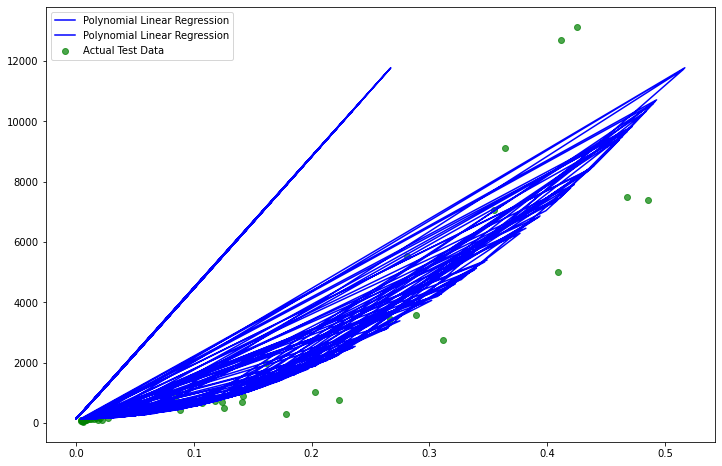

In [63]:
plt.figure(figsize=(12,8))
plt.plot(poly_features, y_predicted, label='Polynomial Linear Regression', color='b')
plt.scatter(X_test, y_test, label='Actual Test Data', color='g', alpha=0.7)
plt.legend()
plt.show()